acc： 0.7165605095541401
              precision    recall  f1-score   support

           0       0.55      0.38      0.45        96
           1       0.76      0.87      0.81       218

    accuracy                           0.72       314
   macro avg       0.66      0.62      0.63       314
weighted avg       0.70      0.72      0.70       314

acc： 0.6910828025477707
              precision    recall  f1-score   support

           0       0.50      0.52      0.51        96
           1       0.78      0.77      0.77       218

    accuracy                           0.69       314
   macro avg       0.64      0.64      0.64       314
weighted avg       0.70      0.69      0.69       314



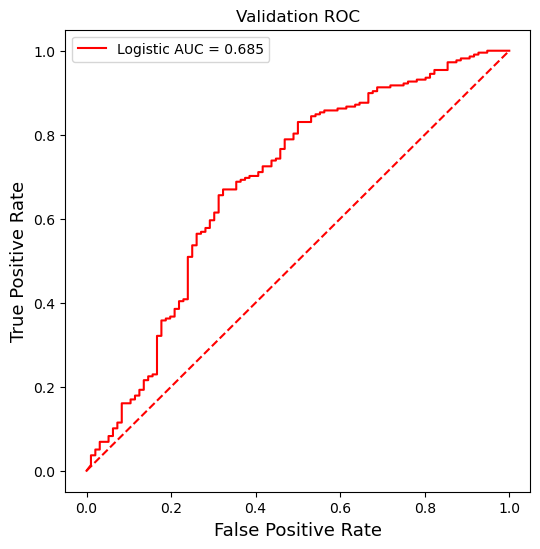

In [2]:
import  pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
#导入必要的包
import warnings
warnings.filterwarnings("ignore")
#忽略警告
import matplotlib.pyplot as plt

data=pd.read_excel("财务数据11.xlsx")
#读取数据
data['ST是否']=data['ST是否'].fillna('1')
data['截止日期_Enddt']=str(data['截止日期_Enddt'])
#把时间数据转换为字符串，这样模型才能处理

data=data.dropna()
#删除空值

for feature in data.columns:
    if data[feature].dtype == 'object':
        data[feature] = pd.Categorical(data[feature]).codes
#如果数据类型是object就把她转换成分类数据
del data['公司全称']
del data['截止日期_Enddt']
del data['上市公司代码_Comcd']
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.3)
#按照7：3划分训练集和验证集
train_X = train.drop('ST是否', axis=1)
#训练集x
train_y=train.ST是否
#训练集y
test_X= test.drop('ST是否', axis=1)
#测试集x
test_y =test.ST是否
#测试集y

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
#逻辑回归模型
model.fit(train_X,train_y)
#训练模型
prediction=model.predict(test_X)
#使用模型进行预测
print('acc：',metrics.accuracy_score(prediction,test_y))
#输出acc
print(classification_report(test_y,prediction,target_names=['0','1']))
#输出分类报告
pred = model.predict_proba(test_X)[:,1]
#获得预测值
fpr, tpr, threshold = metrics.roc_curve(test_y, pred)
#获得fpr和tpr
roc_auc = metrics.auc(fpr, tpr)
#绘画roc——auc


#随机森林
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('acc：',metrics.accuracy_score(prediction,test_y))
print(classification_report(test_y,prediction,target_names=['0','1']))
pred = model.predict_proba(test_X)[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(test_y, pred)
roc_auc1 = metrics.auc(fpr1, tpr1)

plt.figure(figsize=(6,6))
plt.title('Validation ROC')
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.plot(fpr, tpr, 'r', label = 'Logistic AUC = %0.3f' % roc_auc)
# plt.plot(fpr1, tpr1, 'b', label = 'RS AUC = %0.3f' % roc_auc1)
# plt.plot(fpr2, tpr2, label = 'NN AUC = %0.3f' % roc_auc2)
# plt.plot(fpr3, tpr3,  label = 'XBG AUC = %0.3f' % roc_auc3)
# plt.plot(fpr4, tpr4,  label = 'SVM AUC = %0.3f' % roc_auc4)
plt.plot([0, 1], [0, 1],'r--')
plt.legend()
plt.show()



In [4]:
#人工神经网络
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(256, input_shape=(39,), activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(2, activation="softmax"))
sgd = Adam(0.1)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(train_X, train_y1, validation_data=(test_X, test_y1), epochs=20, batch_size=12)
predictions = model.predict(test_X, batch_size=128)
print('acc：',H.history['accuracy'])
print(classification_report(test_y,prediction,target_names=['0','1']))
pred = model.predict(test_X)[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(test_y, pred)
roc_auc2 = metrics.auc(fpr2, tpr2)

plt.figure(figsize=(6,6))
plt.title('Validation ROC')
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
# plt.plot(fpr, tpr, 'r', label = 'Logistic AUC = %0.3f' % roc_auc)
# plt.plot(fpr1, tpr1, 'b', label = 'Random Forest AUC = %0.3f' % roc_auc1)
plt.plot(fpr2, tpr2, label = 'ANN AUC = %0.3f' % roc_auc2)
# plt.plot(fpr3, tpr3,  label = 'XGBoost AUC = %0.3f' % roc_auc3)
# plt.plot(fpr4, tpr4,  label = 'SVM AUC = %0.3f' % roc_auc4)
plt.plot([0, 1], [0, 1],'r--')
plt.legend()
plt.show()

AttributeError: module 'tensorflow.compat.v2.__internal__.tracking' has no attribute 'TrackableSaver'